In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [2]:
!unzip /content/GurNum.zip

Archive:  /content/GurNum.zip
  inflating: GurNum/val/5/14.tiff    
  inflating: GurNum/val/5/13.tiff    
  inflating: GurNum/val/5/9.tiff     
  inflating: GurNum/val/5/18.tiff    
  inflating: GurNum/val/5/20.tiff    
  inflating: GurNum/val/5/12.tiff    
  inflating: GurNum/val/5/7.tiff     
  inflating: GurNum/val/5/17.tiff    
  inflating: GurNum/val/1/9.tiff     
  inflating: GurNum/val/1/6.tiff     
  inflating: GurNum/val/1/5.tiff     
  inflating: GurNum/val/5/11.tiff    
  inflating: GurNum/val/5/5.tiff     
  inflating: GurNum/val/1/16.tiff    
  inflating: GurNum/val/1/12.tiff    
  inflating: GurNum/val/1/8.tiff     
  inflating: GurNum/val/5/4.tiff     
  inflating: GurNum/val/5/6.tiff     
  inflating: GurNum/val/5/8.tiff     
  inflating: GurNum/val/5/19.tiff    
  inflating: GurNum/val/5/2.tiff     
  inflating: GurNum/val/1/11.tiff    
  inflating: GurNum/val/1/2.tiff     
  inflating: GurNum/val/1/18.tiff    
  inflating: GurNum/val/1/13.tiff    
  inflating: GurNum/

In [3]:
from PIL import Image
import os

path = "GurNum/train/1/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/1/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/train/2/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/2/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/train/3/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/3/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/train/4/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/4/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/train/5/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/5/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/train/6/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/6/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/train/7/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/7/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/train/8/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/8/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/train/9/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/9/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/train/0/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/train/0/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

In [4]:
import pathlib
data_dir = pathlib.Path('GurNum/train').with_suffix('')

In [5]:
batch_size = 32
img_height = 32
img_width = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  validation_split=0.2,
  subset="training")

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode='grayscale',
)

Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [9]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 32, 32, 1)
(32,)


In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

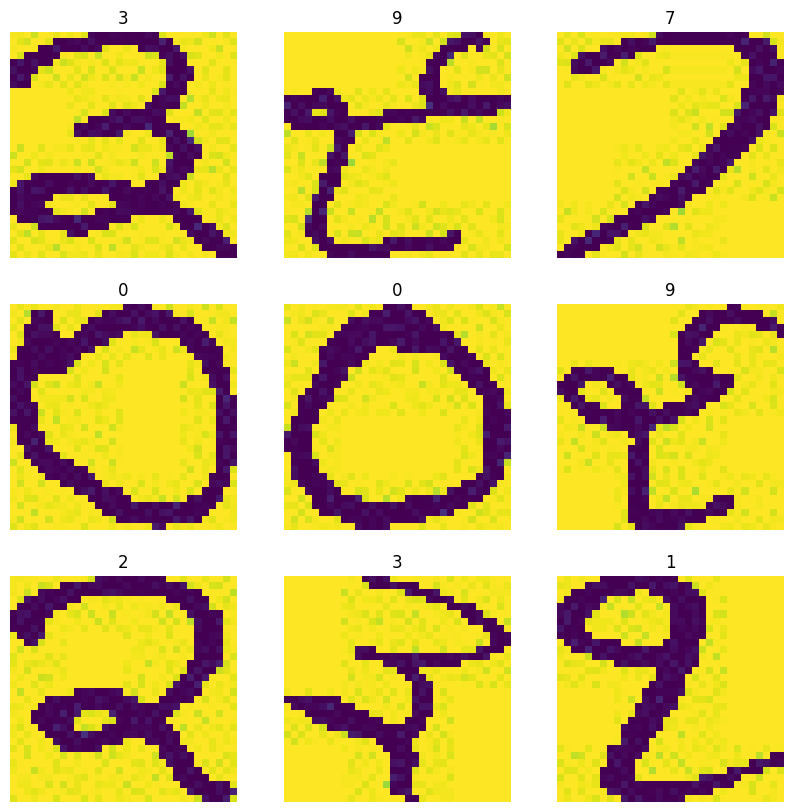

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
25/25 [==============================] - 2s 18ms/step - loss: 58.6488 - accuracy: 0.4588 - val_loss: 35.2523 - val_accuracy: 0.6100
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 11.9595 - accuracy: 0.7650 - val_loss: 9.4347 - val_accuracy: 0.7900
Epoch 3/30
25/25 [==============================] - 0s 6ms/step - loss: 7.4929 - accuracy: 0.8263 - val_loss: 8.3781 - val_accuracy: 0.8300
Epoch 4/30
25/25 [==============================] - 0s 7ms/step - loss: 7.0640 - accuracy: 0.8325 - val_loss: 4.2919 - val_accuracy: 0.8600
Epoch 5/30
25/25 [==============================] - 0s 7ms/step - loss: 3.7112 - accuracy: 0.8763 - val_loss: 7.0244 - val_accuracy: 0.8450
Epoch 6/30
25/25 [==============================] - 0s 7ms/step - loss: 1.7334 - accuracy: 0.9388 - val_loss: 6.0132 - val_accuracy: 0.8800
Epoch 7/30
25/25 [==============================] - 0s 6ms/step - loss: 0.6250 - accuracy: 0.9625 - val_loss: 4.9700 - val_accuracy: 0.8900
Epoch 8/30
25/25

In [16]:
from PIL import Image
import os

path = "GurNum/val/1/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/1/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/val/2/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/2/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/val/3/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/3/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/val/4/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/4/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/val/5/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/5/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/val/6/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/6/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/val/7/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/7/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))
path = "GurNum/val/8/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/8/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/val/9/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/9/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

path = "GurNum/val/0/"
images= os.listdir(path)
for img in images:
    Image.open('GurNum/val/0/'+img).save(os.path.join(path+ str(img).replace(".bmp",".jpg") + '.jpg'))
    os.remove(os.path.join(path + img))

In [17]:
import pathlib
data_dir = pathlib.Path('GurNum/val').with_suffix('')

In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
)

Found 178 files belonging to 10 classes.


In [19]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 7.7909 - accuracy: 0.8876 - 61ms/epoch - 10ms/step

Test accuracy: 0.8876404762268066


In [20]:
# Referance: 
# https://www.tensorflow.org/guide/data#decoding_image_data_and_resizing_it
# https://stackoverflow.com/questions/71047609/what-is-the-best-way-of-converting-a-large-folder-of-bmp-files-to-jpeg
# https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/images.ipynb#scrollTo=S08ZKKODsnGW